In [125]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt


# Reading and manipulating accelrometer data

In [107]:
acc_sensor_path ="/home/muhammad/Desktop/repos_ixp/tester_sony_digirelax/datasets/Empatica/ACC.csv"
acc_df = pd.read_csv(acc_sensor_path)

In [108]:
acc_df

,1695386909.000000,1695386909.000000,1695386909.000000.1
0,32.0,32.0,32.0
1,24.0,-7.0,58.0
2,24.0,-7.0,57.0
3,24.0,-7.0,57.0
4,24.0,-7.0,57.0
...,...,...,...
124442,9.0,14.0,61.0
124443,9.0,14.0,61.0
124444,9.0,14.0,61.0
124445,9.0,15.0,61.0


In [109]:
acc_df = pd.read_csv(acc_sensor_path, names = ['x', 'y', 'z'])

In [110]:
acc_df

,x,y,z
0,1.695387e+09,1.695387e+09,1.695387e+09
1,3.200000e+01,3.200000e+01,3.200000e+01
2,2.400000e+01,-7.000000e+00,5.800000e+01
3,2.400000e+01,-7.000000e+00,5.700000e+01
4,2.400000e+01,-7.000000e+00,5.700000e+01
...,...,...,...
124443,9.000000e+00,1.400000e+01,6.100000e+01
124444,9.000000e+00,1.400000e+01,6.100000e+01
124445,9.000000e+00,1.400000e+01,6.100000e+01
124446,9.000000e+00,1.500000e+01,6.100000e+01


In [111]:
start_time = acc_df.iloc[0,0]
sampling_frequency = acc_df.iloc[1,0]
sampling_time = 1/sampling_frequency

In [112]:
time_stamps = start_time + (acc_df.index -2)*sampling_time

In [113]:
time_stamps

Float64Index([ 1695386908.9375, 1695386908.96875,     1695386909.0,
              1695386909.03125,  1695386909.0625, 1695386909.09375,
                1695386909.125, 1695386909.15625,  1695386909.1875,
              1695386909.21875,
              ...
                1695390797.625, 1695390797.65625,  1695390797.6875,
              1695390797.71875,    1695390797.75, 1695390797.78125,
               1695390797.8125, 1695390797.84375,   1695390797.875,
              1695390797.90625],
             dtype='float64', length=124448)

In [114]:
acc_df["timestamps"] = time_stamps

In [115]:
magnitude= np.sqrt(acc_df.iloc[2:,0]**2 + acc_df.iloc[2:,1]**2 + acc_df.iloc[2:,2]**2)

In [116]:
magnitude

2         63.158531
3         62.241465
4         62.241465
5         62.241465
6         62.241465
            ...    
124443    63.229740
124444    63.229740
124445    63.229740
124446    63.458648
124447    63.015871
Length: 124446, dtype: float64

In [117]:
acc_df["magnitude"] = magnitude

In [118]:
acc_df

,x,y,z,timestamps,magnitude
0,1.695387e+09,1.695387e+09,1.695387e+09,1.695387e+09,NaN
1,3.200000e+01,3.200000e+01,3.200000e+01,1.695387e+09,NaN
2,2.400000e+01,-7.000000e+00,5.800000e+01,1.695387e+09,63.158531
3,2.400000e+01,-7.000000e+00,5.700000e+01,1.695387e+09,62.241465
4,2.400000e+01,-7.000000e+00,5.700000e+01,1.695387e+09,62.241465
...,...,...,...,...,...
124443,9.000000e+00,1.400000e+01,6.100000e+01,1.695391e+09,63.229740
124444,9.000000e+00,1.400000e+01,6.100000e+01,1.695391e+09,63.229740
124445,9.000000e+00,1.400000e+01,6.100000e+01,1.695391e+09,63.229740
124446,9.000000e+00,1.500000e+01,6.100000e+01,1.695391e+09,63.458648


In [119]:
trace = acc_df["magnitude"]

In [120]:
np.mean(trace)

62.80721674689598

In [121]:
trace = trace-np.mean(trace)

In [122]:
trace = trace/np.max(np.abs(trace))

In [124]:
acc_df["magnitude_norm"]=trace

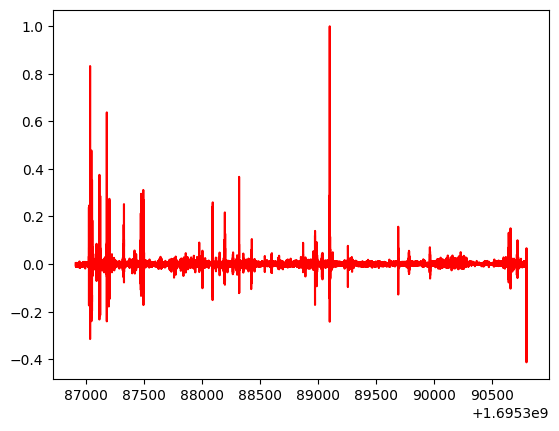

In [127]:
plt.plot(acc_df["timestamps"], acc_df["magnitude_norm"], color = "red")

#  Reading and manipulating EDA data

In [174]:
eda_path = "/home/muhammad/Desktop/repos_ixp/tester_sony_digirelax/datasets/Empatica/EDA.csv"

In [175]:
eda_df = pd.read_csv(eda_path, names = ['eda'])

In [176]:
eda_df

,eda
0,1.695387e+09
1,4.000000e+00
2,0.000000e+00
3,2.434200e-02
4,5.252800e-02
...,...
15549,8.408756e+00
15550,8.397226e+00
15551,8.380570e+00
15552,8.354947e+00


In [177]:
start_time_eda = eda_df.iloc[0,0]

In [178]:
start_time_eda

1695386909.0

In [179]:
sampling_frequency_eda = eda_df.iloc[1,0]
sampling_time_eda = 1/sampling_frequency_eda

In [180]:
sampling_time_eda

0.25

In [181]:
time_stamps_eda = start_time_eda + (eda_df.index -2)*sampling_time_eda

In [182]:
time_stamps_eda

Float64Index([ 1695386908.5, 1695386908.75,  1695386909.0, 1695386909.25,
               1695386909.5, 1695386909.75,  1695386910.0, 1695386910.25,
               1695386910.5, 1695386910.75,
              ...
               1695390794.5, 1695390794.75,  1695390795.0, 1695390795.25,
               1695390795.5, 1695390795.75,  1695390796.0, 1695390796.25,
               1695390796.5, 1695390796.75],
             dtype='float64', length=15554)

In [183]:
eda_df["timestamps"] = time_stamps_eda

In [184]:
eda_df

,eda,timestamps
0,1.695387e+09,1.695387e+09
1,4.000000e+00,1.695387e+09
2,0.000000e+00,1.695387e+09
3,2.434200e-02,1.695387e+09
4,5.252800e-02,1.695387e+09
...,...,...
15549,8.408756e+00,1.695391e+09
15550,8.397226e+00,1.695391e+09
15551,8.380570e+00,1.695391e+09
15552,8.354947e+00,1.695391e+09


In [185]:
magnitude= eda_df.iloc[2:,0]

In [196]:
eda_df["eda"] = magnitude

In [197]:
eda_df

,eda,timestamps,eda_norm
0,NaN,1.695387e+09,NaN
1,NaN,1.695387e+09,NaN
2,0.000000,1.695387e+09,-0.329462
3,0.024342,1.695387e+09,-0.326317
4,0.052528,1.695387e+09,-0.322676
...,...,...,...
15549,8.408756,1.695391e+09,0.756909
15550,8.397226,1.695391e+09,0.755419
15551,8.380570,1.695391e+09,0.753267
15552,8.354947,1.695391e+09,0.749957


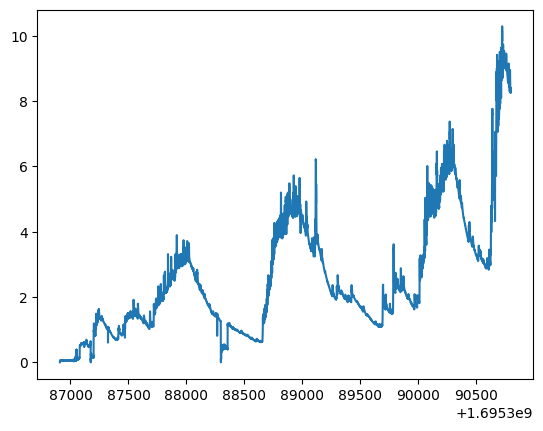

In [198]:
plt.plot(eda_df["timestamps"], eda_df["eda"])

In [186]:
magnitude

2        0.000000
3        0.024342
4        0.052528
5        0.055091
6        0.055091
           ...   
15549    8.408756
15550    8.397226
15551    8.380570
15552    8.354947
15553    8.266546
Name: eda, Length: 15552, dtype: float64

In [187]:
magnitude_norm =magnitude - np.mean(magnitude)

In [188]:
magnitude_norm = magnitude_norm / np.max(np.abs(magnitude_norm))

In [190]:
eda_df['eda_norm'] = magnitude_norm

In [192]:
eda_df

,eda,timestamps,eda_norm
0,1.695387e+09,1.695387e+09,NaN
1,4.000000e+00,1.695387e+09,NaN
2,0.000000e+00,1.695387e+09,-0.329462
3,2.434200e-02,1.695387e+09,-0.326317
4,5.252800e-02,1.695387e+09,-0.322676
...,...,...,...
15549,8.408756e+00,1.695391e+09,0.756909
15550,8.397226e+00,1.695391e+09,0.755419
15551,8.380570e+00,1.695391e+09,0.753267
15552,8.354947e+00,1.695391e+09,0.749957


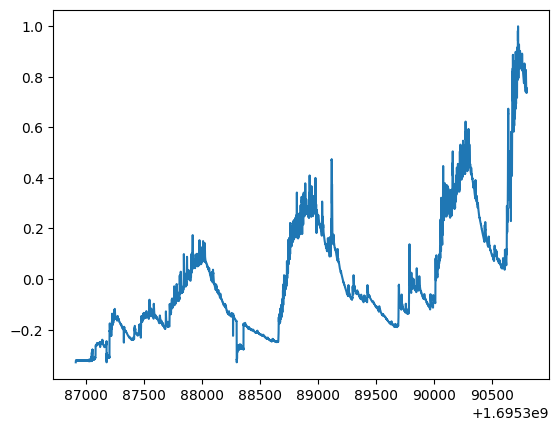

In [194]:
plt.plot(eda_df["timestamps"], eda_df["eda_norm"])

## BVP -------

In [207]:
bvp_path = "/home/muhammad/Desktop/repos_ixp/tester_sony_digirelax/datasets/Empatica/BVP.csv"
bvp_df= pd.read_csv(bvp_path)

In [209]:
start_time = bvp_df.iloc[0,0]
sampling_frquency = 

In [210]:
start_time

64.0